# Import Library and Data

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv('/content/adidas.csv')

In [3]:
data.head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet


In [4]:
data.shape

(9641, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


In [6]:
data.isna().sum() / data.shape[0]

,0
Retailer,0.000000
Retailer ID,0.000000
Invoice Date,0.000000
Region,0.000000
State,0.000000
City,0.000000
Product,0.000000
Price per Unit,0.000207
Units Sold,0.000000
Total Sales,0.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data.describe(include = object)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
count,9641,9641,9641,9641,9641,9641,9639,9641,9641,9641,9641
unique,6,724,5,50,52,7,94,361,1710,1530,3
top,Foot Locker,1/17/2021,West,California,Portland,Men's Street Footwear,$50.00,225,"10,000","$6,300",Online
freq,2634,77,2446,430,360,1610,674,207,66,39,4889


In [9]:
# set style of visualization

sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [10]:
# drop column have missing value in Price per units columns

data.dropna(subset = "Price per Unit", inplace = True)

In [11]:
data.isna().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


# Dataset Explanation
• Retailer: Represents the business or individual that sells Adidas products directly to consumers.

• Retailer ID: A unique identifier assigned to each retailer in the dataset.

• Invoice Date: The date when a particular invoice or sales transaction took place.

• Region: Refers to a specific geographical area or district where the sales activity or retail operations occur.

• State: Represents a specific administrative division or territory within a country.

• City: Refers to an urban area or municipality where the sales activity or retail operations are conducted.

• Product: Represents the classification or grouping of Adidas products.

• Price per Unit: The cost or price associated with a single unit of a product.

• Units Sold: The quantity or number of units of a particular product sold during a specific sales transaction.

• Total Sales: The overall revenue generated from the sales transactions.

• Operating Profit: The profit earned by the retailer from its normal business operations.

• Sales Method: The approach or channel used by the retailer to sell its products or services.

## Discover Column

In [12]:
data['Retailer'].unique()

array(['Walmart', 'West Gear', 'Sports Direct', 'Foot Locker', 'Amazon',
       "Kohl's"], dtype=object)

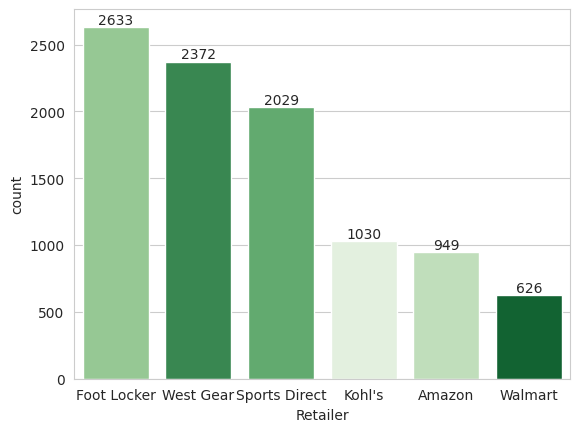

In [22]:
graph = sns.countplot(x="Retailer", hue="Retailer", data=data,
                      order=data.Retailer.value_counts().index,
                      palette=sns.color_palette("Greens_r", len(data['Retailer'].unique())),
                      legend=False, dodge=False)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

In [23]:
data["Invoice Date"].unique()[:50]

array(['6/17/2021', '7/16/2021', '8/25/2021', '8/27/2021', '8/21/2021',
       '1/11/2021', '11/17/2021', '1/23/2021', '4/3/2021', '3/10/2020',
       '1/18/2021', '2/11/2021', '6/11/2021', '4/10/2021', '3/16/2021',
       '9/16/2021', '2/21/2021', '10/21/2021', '5/3/2020', '4/19/2020',
       '4/27/2020', '3/10/2021', '10/11/2021', '11/11/2021', '3/4/2020',
       '1/25/2020', '1/7/2020', '1/1/2020', '2/7/2021', '8/22/2021',
       '2/18/2021', '8/11/2021', '4/17/2021', '11/20/2021', '3/16/2020',
       '8/26/2020', '9/1/2020', '1/31/2020', '2/6/2020', '3/17/2020',
       '4/18/2020', '3/15/2020', '3/17/2021', '6/18/2021', '10/18/2021',
       '11/18/2021', '5/12/2021', '9/12/2021', '3/19/2021', '9/19/2021'],
      dtype=object)

In [24]:
# convert data type to date time

data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Invoice Date']

,Invoice Date
0,2021-06-17
1,2021-07-16
2,2021-08-25
3,2021-08-27
4,2021-08-21
...,...
9636,2021-11-18
9637,2021-10-22
9638,2021-10-22
9639,2021-04-10


In [25]:
# extract month

data['Month'] = data['Invoice Date'].dt.month
data['Month']

,Month
0,6
1,7
2,8
3,8
4,8
...,...
9636,11
9637,10
9638,10
9639,4


In [26]:
# extract year

data['Year'] = data['Invoice Date'].dt.year
data['Year']

,Year
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
9636,2021
9637,2021
9638,2021
9639,2021


In [27]:
# extract day

data['Day'] = data['Invoice Date'].dt.day
data['Day']

,Day
0,17
1,16
2,25
3,27
4,21
...,...
9636,18
9637,22
9638,22
9639,10


In [28]:
# create season column

def find_seasons(monthNumber):
    if monthNumber in [12, 1, 2]:
        return 'Winter'

    elif monthNumber in [3, 4, 5]:
        return 'Spring'

    elif monthNumber in [6, 7, 8]:
        return 'Summer'

    elif monthNumber in [9, 10, 11]:
        return 'Autumn'

data['Season'] = data['Month'].apply(find_seasons)
data['Season']

,Season
0,Summer
1,Summer
2,Summer
3,Summer
4,Summer
...,...
9636,Autumn
9637,Autumn
9638,Autumn
9639,Spring


In [29]:
# convert mont column to month name

data['Month'] = pd.to_datetime(data['Month'], format='%m').dt.month_name()


In [30]:
# drop Invoice Date, Retailer ID columns

data.drop(columns = ['Retailer ID', 'Invoice Date'], inplace = True)

In [31]:
data.sample(2)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
3029,West Gear,West,Colorado,Denver,Women's Apparel,$75.00,137,"1,028",$339,Online,May,2020,25,Spring
6546,West Gear,Southeast,Florida,Miami,Women's Apparel,$70.00,975,"68,250","$34,125",In-store,September,2020,16,Autumn


In [32]:
# convert some column datatype

data["Day"] = data['Day'].astype('category')
# -----------------
data['Season'] = data['Season'].astype('category')
# -----------------
data['Year'] = data['Year'].astype('category')

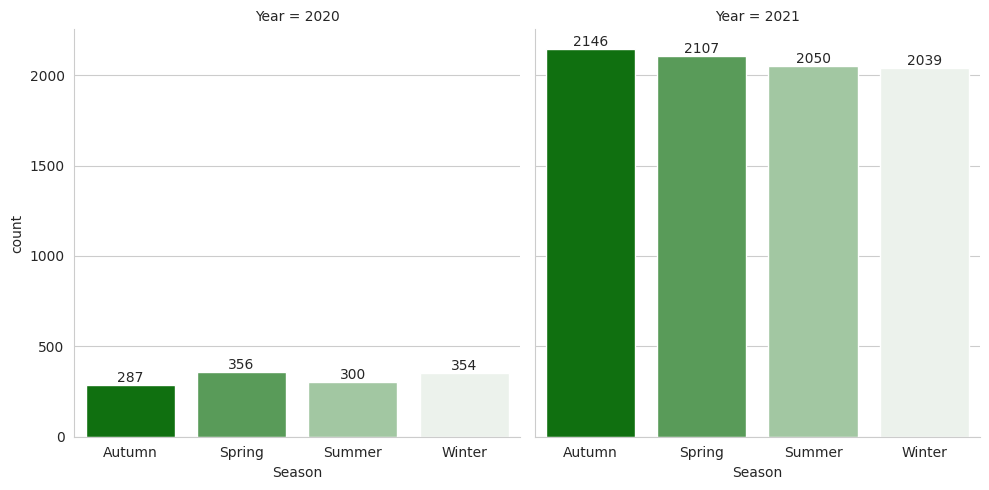

In [36]:
num_colors = len(data['Season'].unique())
my_palette = sns.light_palette("green", n_colors=num_colors, reverse=True)

graph = sns.catplot(x="Season", col="Year", hue="Season", data=data, kind="count", palette=my_palette, legend=False)

for ax in graph.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

plt.show()

In [37]:
print(data['Region'].nunique())
print('-' * 20)
print(data['Region'].unique())

5
--------------------
['Southeast' 'South' 'Midwest' 'Northeast' 'West']


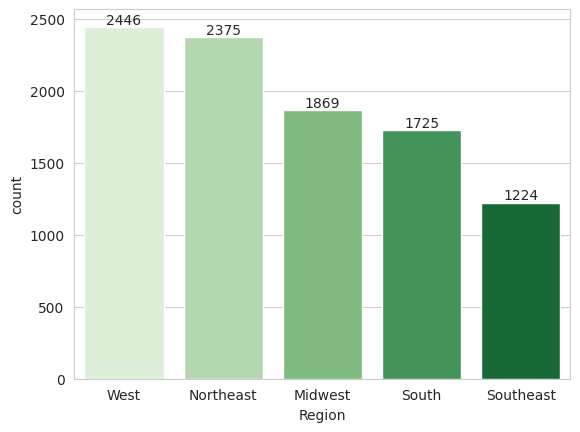

In [39]:
graph = sns.countplot(x="Region", hue="Region", data=data,
                      order=data.Region.value_counts().index,
                      palette=sns.color_palette("Greens_r", len(data['Region'].unique())),
                      legend=False, dodge=False)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

In [40]:
print(data['State'].nunique())
print('-' * 20)
print(data['State'].unique())

50
--------------------
['Florida' 'Louisiana' 'Alabama' 'Missouri' 'Mississippi' 'Wisconsin'
 'New York' 'Michigan' 'Utah' 'Ohio' 'Arkansas' 'Georgia' 'Texas'
 'Oklahoma' 'West Virginia' 'California' 'South Carolina' 'Kansas'
 'Tennessee' 'North Carolina' 'Idaho' 'Indiana' 'New Jersey' 'Oregon'
 'South Dakota' 'North Dakota' 'Iowa' 'Maryland' 'Delaware' 'Washington'
 'Virginia' 'Wyoming' 'Minnesota' 'Kentucky' 'Connecticut' 'Rhode Island'
 'Massachusetts' 'New Mexico' 'Nevada' 'Illinois' 'Nebraska' 'Maine'
 'Arizona' 'Vermont' 'New Hampshire' 'Hawaii' 'Montana' 'Colorado'
 'Pennsylvania' 'Alaska']


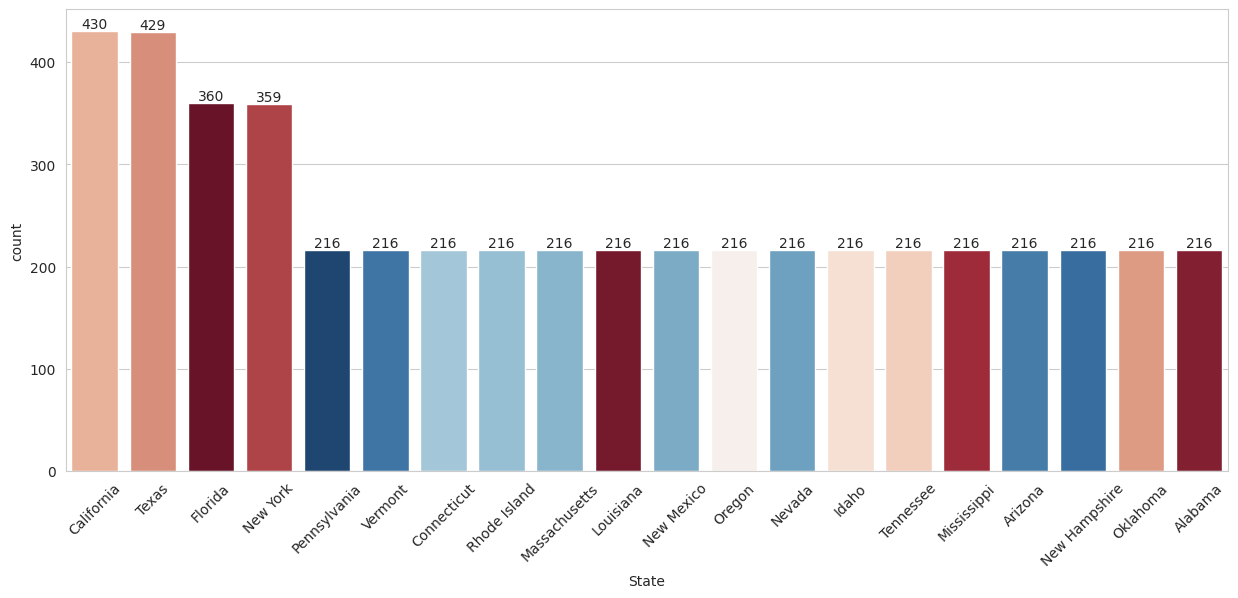

In [42]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(x="State", hue="State", data=data,
                      order=data.State.value_counts()[:20].index,
                      palette="RdBu", legend=False)
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation=45)
plt.show()

In [ ]:
print(data['City'].nunique())
print('-' * 20)
print(data['City'].unique())

52
--------------------
['Orlando' 'New Orleans' 'Birmingham' 'St. Louis' 'Jackson' 'Milwaukee'
 'New York' 'Detroit' 'Salt Lake City' 'Columbus' 'Little Rock' 'Atlanta'
 'Houston' 'Oklahoma City' 'Charleston' 'San Francisco' 'Dallas' 'Wichita'
 'Miami' 'Knoxville' 'Los Angeles' 'Charlotte' 'Boise' 'Indianapolis'
 'Newark' 'Portland' 'Sioux Falls' 'Fargo' 'Des Moines' 'Baltimore'
 'Wilmington' 'Seattle' 'Richmond' 'Albany' 'Cheyenne' 'Minneapolis'
 'Louisville' 'Hartford' 'Providence' 'Boston' 'Albuquerque' 'Las Vegas'
 'Chicago' 'Omaha' 'Phoenix' 'Burlington' 'Manchester' 'Honolulu'
 'Billings' 'Denver' 'Philadelphia' 'Anchorage']


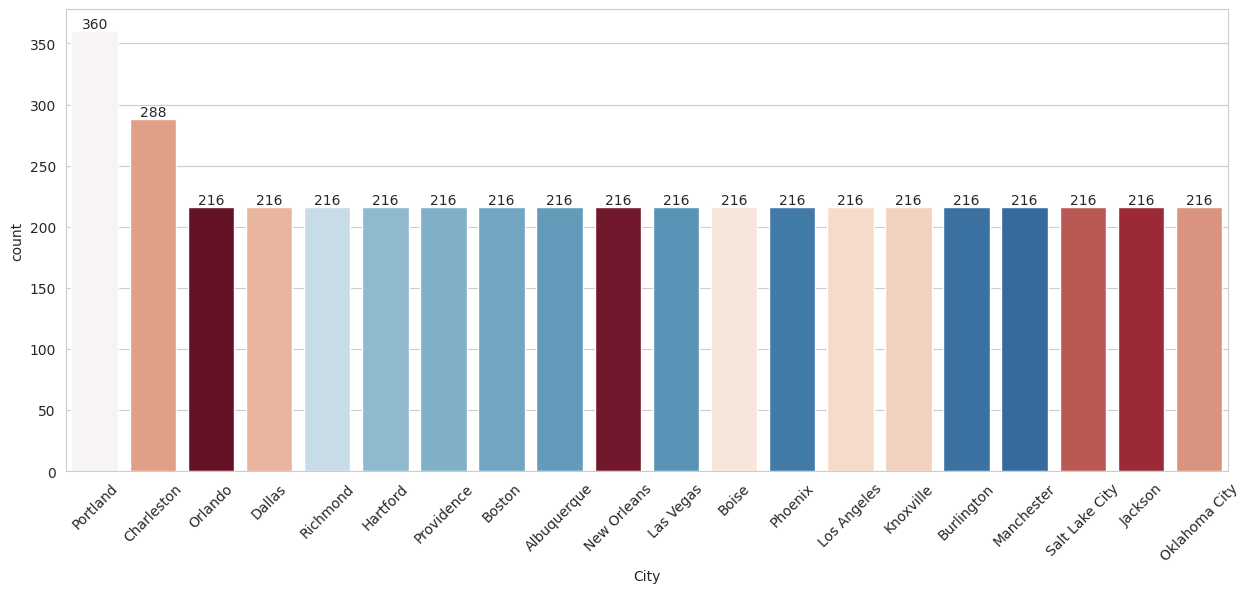

In [43]:
plt.figure(figsize=(15, 6))
graph = sns.countplot(x="City", hue="City", data=data,
                      order=data.City.value_counts()[:20].index,
                      palette="RdBu", legend=False)
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation=45)
plt.show()

In [44]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

7
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Men's aparel"]


In [45]:
# replace replace <Men's aparel> with <Men's Apparel>

data['Product'] = data['Product'].replace("Men's aparel", "Men's Apparel")

In [46]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

6
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"]


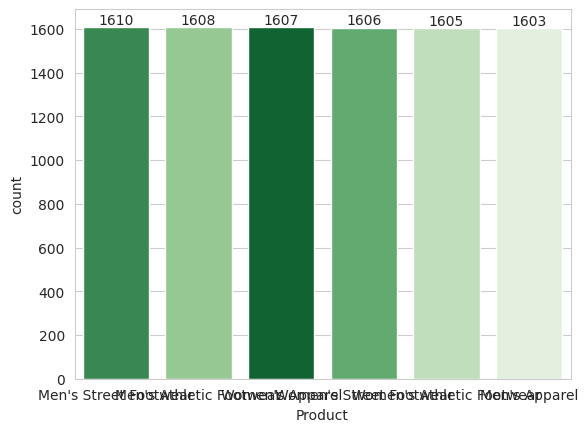

In [48]:
graph = sns.countplot(x="Product", hue="Product", data=data,
                      order=data.Product.value_counts().index,
                      palette=sns.color_palette("Greens_r", len(data['Product'].unique())),
                      legend=False, dodge=False)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

In [49]:
data['Price per Unit'].unique()

array(['$103.00 ', '$10.00 ', '$15.00 ', '$20.00 ', '$44.00 ', '$48.00 ',
       '$39.00 ', '$46.00 ', '$47.00 ', '$40.00 ', '$33.00 ', '$34.00 ',
       '$31.00 ', '$41.00 ', '$29.00 ', '$56.00 ', '$37.00 ', '$25.00 ',
       '$32.00 ', '$36.00 ', '$43.00 ', '$45.00 ', '$38.00 ', '$26.00 ',
       '$42.00 ', '$35.00 ', '$50.00 ', '$62.00 ', '$58.00 ', '$63.00 ',
       '$53.00 ', '$30.00 ', '$59.00 ', '$54.00 ', '$28.00 ', '$24.00 ',
       '$27.00 ', '$55.00 ', '$61.00 ', '$23.00 ', '$60.00 ', '$64.00 ',
       '$51.00 ', '$52.00 ', '$68.00 ', '$67.00 ', '$86.00 ', '$66.00 ',
       '$49.00 ', '$74.00 ', '$83.00 ', '$69.00 ', '$57.00 ', '$79.00 ',
       '$73.00 ', '$65.00 ', '$22.00 ', '$80.00 ', '$21.00 ', '$12.00 ',
       '$77.00 ', '$72.00 ', '$76.00 ', '$13.00 ', '$70.00 ', '$82.00 ',
       '$19.00 ', '$88.00 ', '$7.00 ', '$14.00 ', '$71.00 ', '$16.00 ',
       '$17.00 ', '$87.00 ', '$18.00 ', '$81.00 ', '$78.00 ', '$9.00 ',
       '$92.00 ', '$85.00 ', '$90.00 ', '$89.00 ', '

In [50]:
# remone $

def removeDollarSign(price):
    return price.replace('$', '')

data['Price per Unit'] = data['Price per Unit'].apply(removeDollarSign)
data['Price per Unit']

,Price per Unit
0,103.00
1,103.00
2,10.00
3,15.00
4,15.00
...,...
9636,65.00
9637,65.00
9638,75.00
9639,65.00


In [51]:
# convert data type to numeric

data['Price per Unit'] = pd.to_numeric(data['Price per Unit'], errors = 'coerce')

In [52]:
# check nan value after assign error equal to "coerce"

data['Price per Unit'].isna().sum()

0

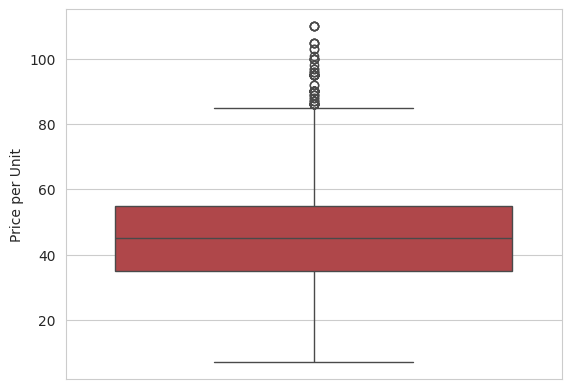

In [53]:
sns.boxplot(y = 'Price per Unit', data = data)
plt.show()

In [54]:
data['Units Sold'].unique()[-50:]

array(['1,250', '1,220', '1,200', '1,150', '1,125', '1,075', '975', '925',
       '900', '875', '650', '600', '1,100', '1,070', '1,050', '1,045',
       '1,025', '1,020', '1,000', '950', '945', '920', '870', '850',
       '825', '820', '800', '795', '775', '770', '745', '725', '720',
       '695', '675', '670', '645', '625', '620', '595', '570', '550',
       '545', '525', '520', '500', '495', '470', '445', '395'],
      dtype=object)

In [55]:
# replace comma with empty string

def replace_comma(Unit):
    return Unit.replace(',', '')

data['Units Sold'] = data['Units Sold'].apply(replace_comma)

In [56]:
# check comma removed or not

data['Units Sold'].unique()[-50:]

array(['1250', '1220', '1200', '1150', '1125', '1075', '975', '925',
       '900', '875', '650', '600', '1100', '1070', '1050', '1045', '1025',
       '1020', '1000', '950', '945', '920', '870', '850', '825', '820',
       '800', '795', '775', '770', '745', '725', '720', '695', '675',
       '670', '645', '625', '620', '595', '570', '550', '545', '525',
       '520', '500', '495', '470', '445', '395'], dtype=object)

In [57]:
# convert data type to integer

data['Units Sold'] = data['Units Sold'].astype('int')

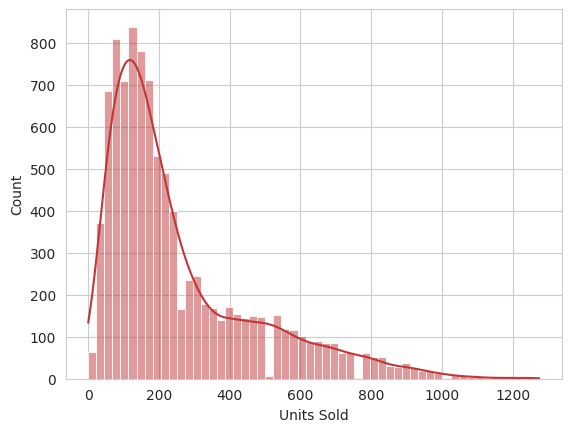

In [58]:
sns.histplot(data = data, x = "Units Sold", kde=True)
plt.show()

In [59]:
# show rows contain zero in Units Sold column

data[data["Units Sold"] == 0]

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
6529,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,35.0,0,0,$0,Outlet,June,2021,5,Summer
6530,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,30.0,0,0,$0,Outlet,June,2021,11,Summer
6531,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,33.0,0,0,$0,Online,June,2021,5,Summer
6532,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,27.0,0,0,$0,Online,June,2021,11,Summer


In [60]:
# drop rows contain zero

data = data[data['Units Sold'] != 0]


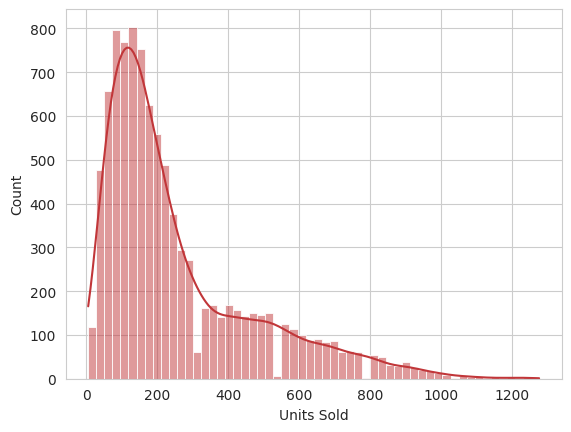

In [61]:
# visualized Units Sold column after fix inconsistent values

sns.histplot(x = "Units Sold", data = data, kde = True)
plt.show()

In [62]:
data['Total Sales'].unique()

array(['2,245', '1,679', '7,000', ..., '9,900', '11,700', '10,725'],
      dtype=object)

In [63]:
# replace comma with empty string

data['Total Sales'] = data['Total Sales'].apply(replace_comma) # replace_comma function i created it above

In [64]:
# convert data type to numeric

data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors = 'coerce', downcast = 'float')

In [65]:
data.sample(3)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
5214,Sports Direct,Northeast,Connecticut,Hartford,Men's Athletic Footwear,47.0,75,353.0,$183,Online,September,2021,3,Autumn
6523,Foot Locker,Midwest,Minnesota,Minneapolis,Women's Athletic Footwear,32.0,7,22.0,$11,Online,November,2020,7,Autumn
2830,Kohl's,Midwest,Montana,Billings,Women's Street Footwear,44.0,143,629.0,$371,Online,February,2021,4,Winter
